In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. Preliminary analysis:
Perform preliminary data inspection to examine the structure of the data, missing values, duplicates.

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [ ]:
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

Bivariate analysis of the target column wrt to the age column

<Axes: xlabel='target', ylabel='age'>

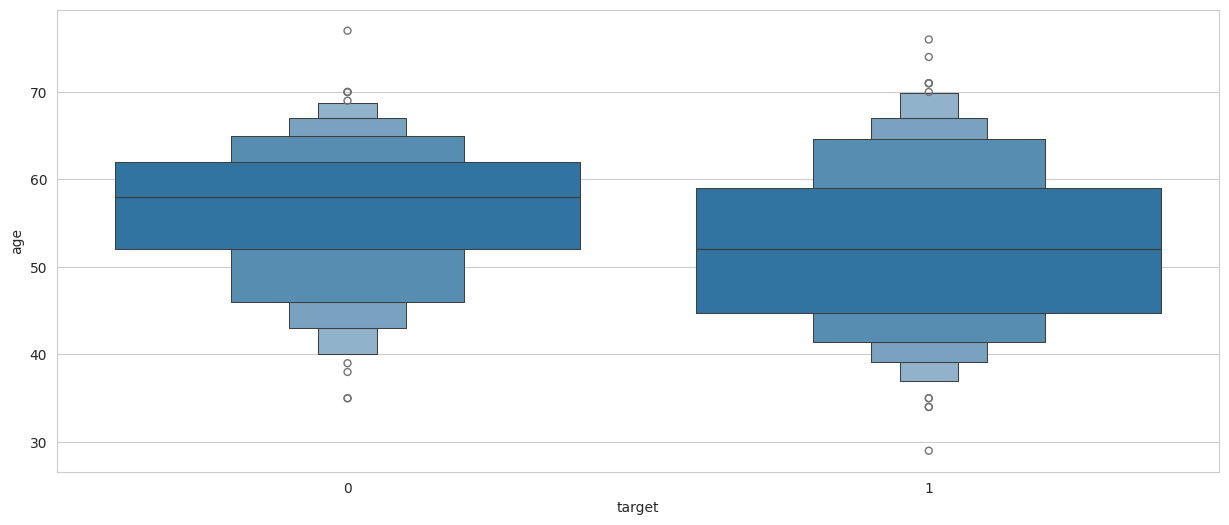

In [ ]:
sns.boxenplot(data=df, x='target', y='age')

Text(0.5, 1.0, 'Correlation between variables')

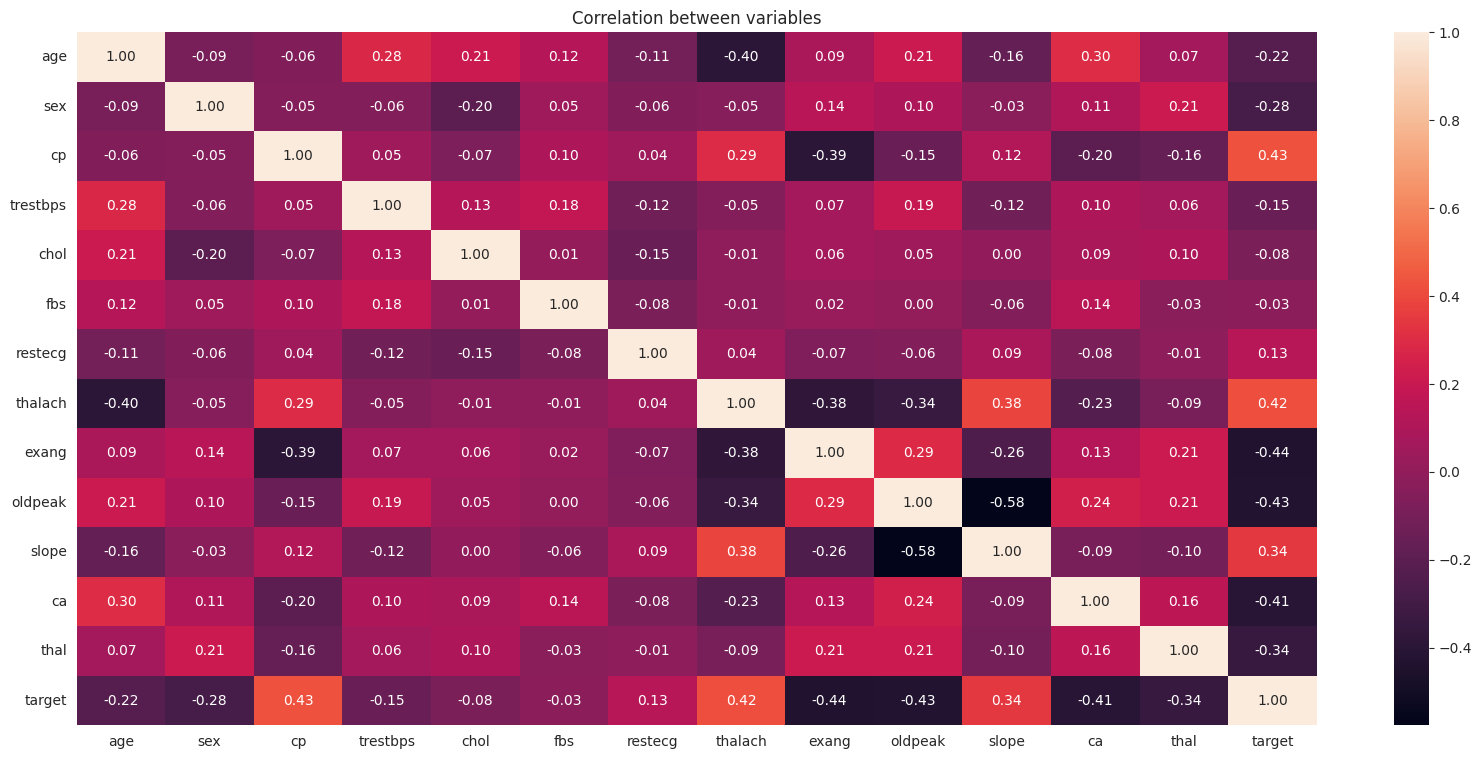

In [ ]:
#plt.figure(figsize=(15,15))
plt.rcParams['figure.figsize']=(20,9)
sns.heatmap(df.corr(),annot= True, fmt= '.2f')
plt.title("Correlation between variables")

<ipython-input-42-1cc6dd8afc90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df, palette='RdBu_r')


Text(0.5, 1.0, 'Count of target variable')

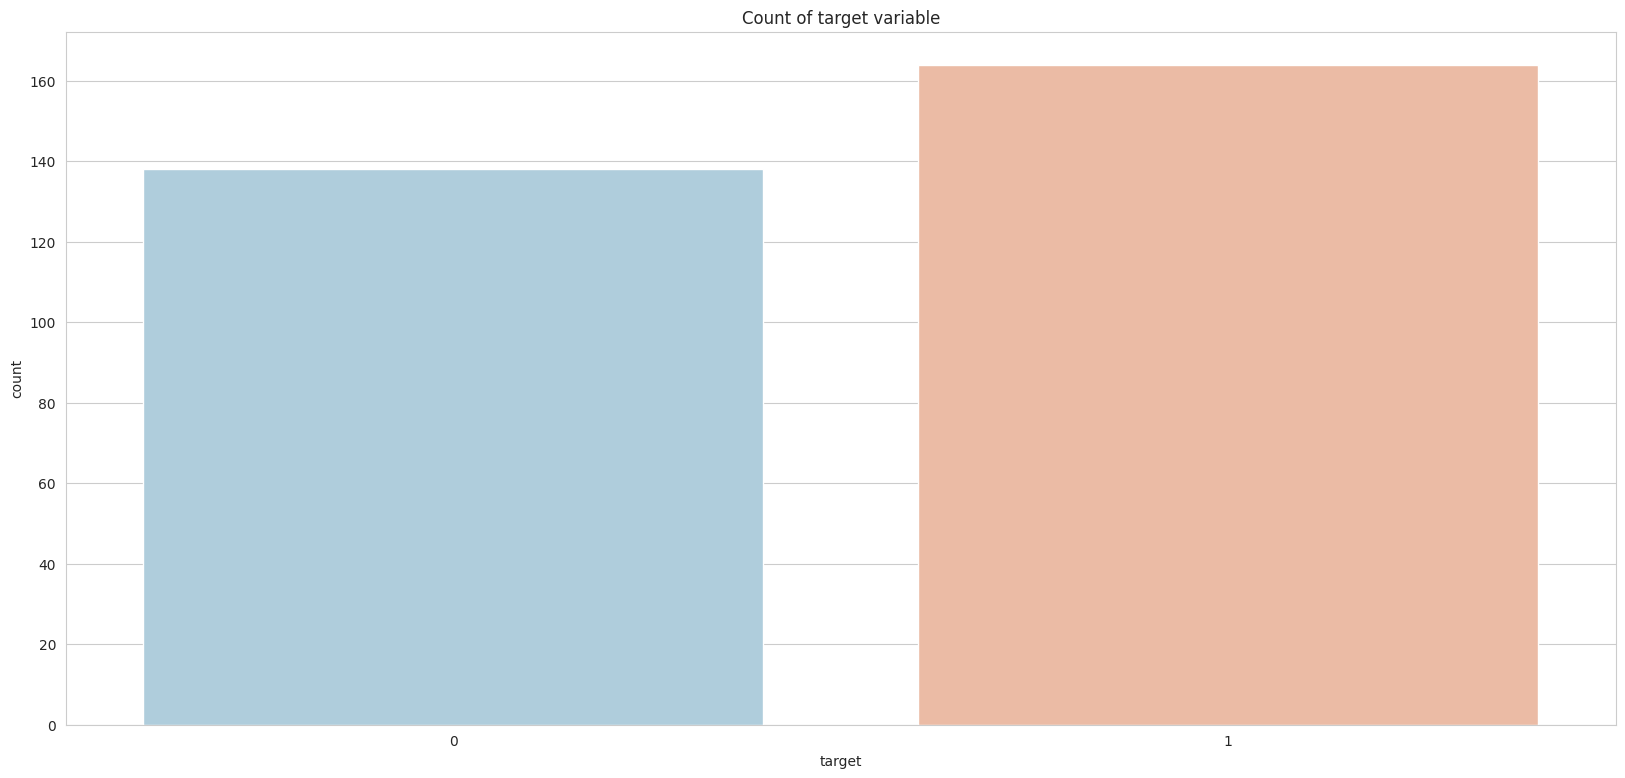

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='target',data=df, palette='RdBu_r')
plt.rcParams['figure.figsize']=(15,6)
plt.title('Count of target variable')

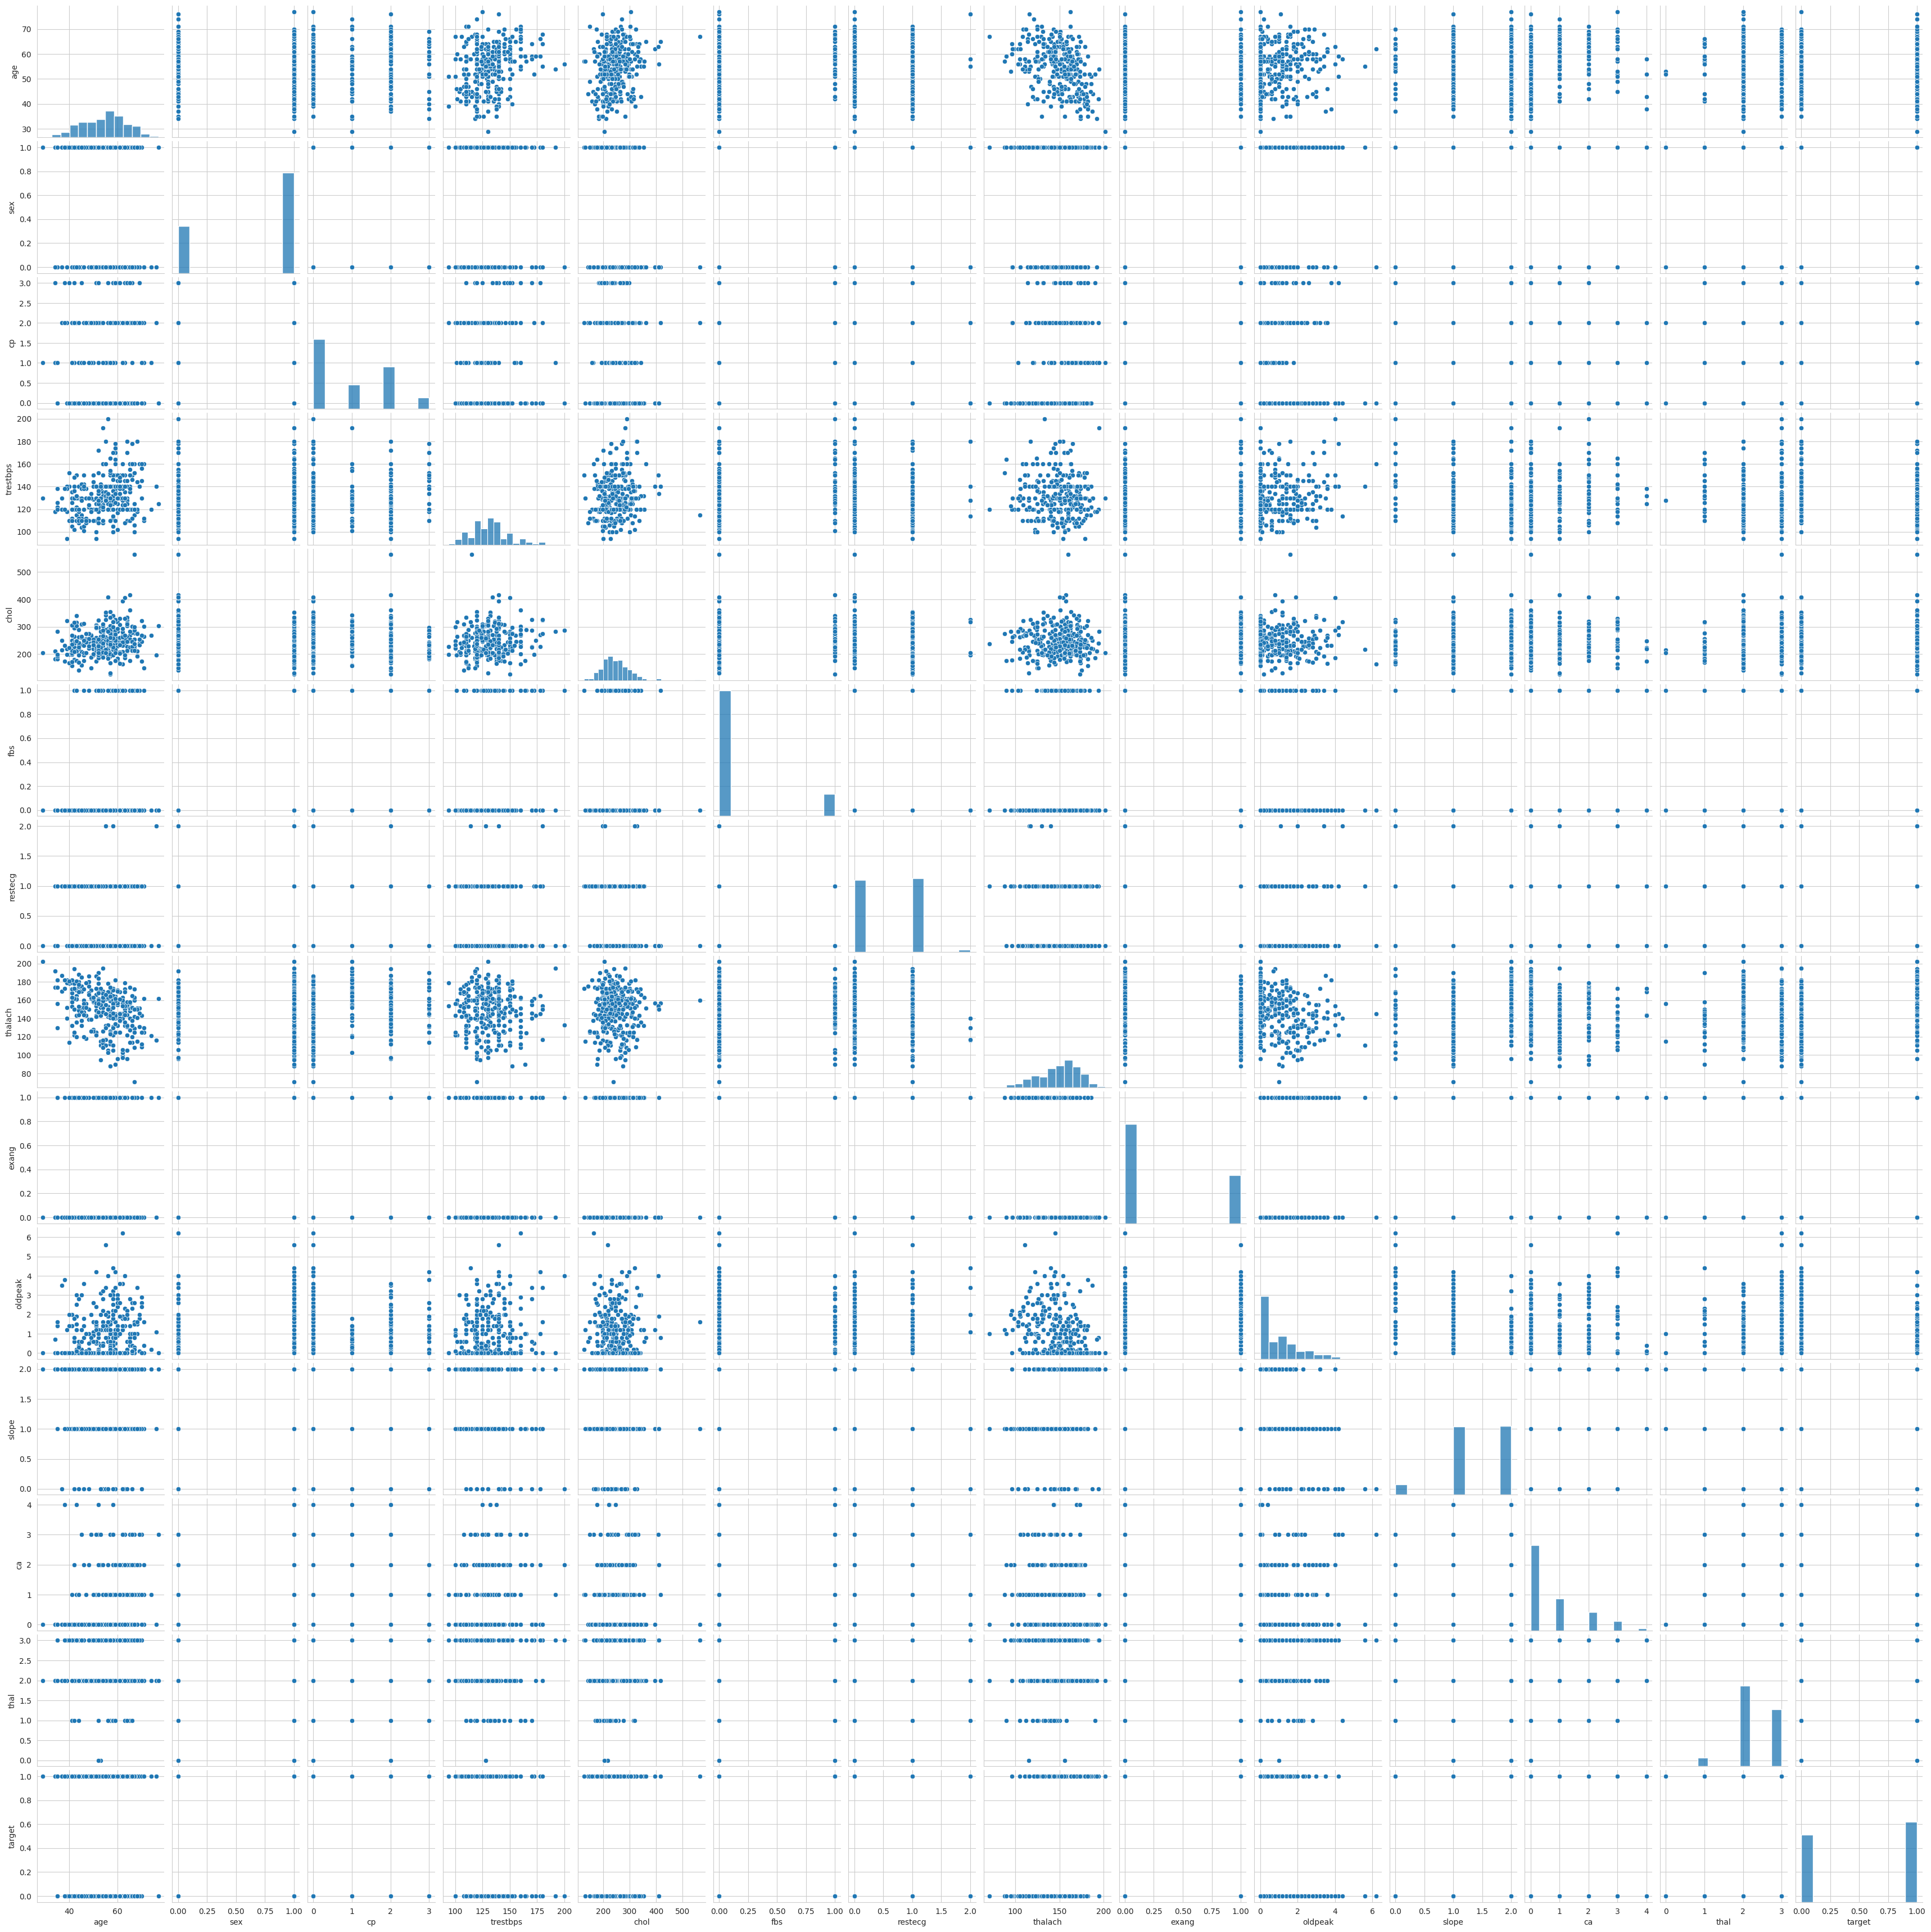

In [ ]:
sns.pairplot(df)

MODEL TRAINING

In [ ]:
X =df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

USE LAZY PREDICT TO SELECT THE BEST 3 MODELS

In [ ]:
pip install lazypredict
from lazypredict.Supervised import LazyClassifier

SyntaxError: invalid syntax (<ipython-input-52-b16258e7e2ed>, line 1)

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
models

LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_predict= lr.predict(X_test_scaled)
lr_acc= accuracy_score(y_test,y_predict)
print("Accuracy of Logistic Regression classifier is ",lr_acc)
print('\n')

Accuracy of Logistic Regression classifier is  0.8131868131868132




RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=12,max_depth=5)
rf.fit(X_train_scaled,y_train)
rf_predicted = rf.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[34  8]
 [ 8 41]]


Accuracy of Random Forest: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



HYPERPARAMETER TUNING

In [ ]:
grid_params = [
    {"n_estimators": [50,100,150,200,250,300],
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
    },
]

In [ ]:

from sklearn.model_selection import GridSearchCV

In [ ]:

grid_search = GridSearchCV(estimator = rf, param_grid= grid_params, scoring = 'accuracy', n_jobs= -1, cv = 3, verbose = 10)

In [ ]:
best_model = grid_search.fit(X_train_scaled,y_train.ravel())

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
best_model.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
best_model.best_estimator_

RandomForestClassifier(max_depth=15, max_features='auto', random_state=12)

RETRAIN WITH THE BEST PARAMETER FOR RANDOMFORESTCLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf = RandomForestClassifier(n_estimators=200, random_state=12,max_depth=5)
rf.fit(X_train_scaled,y_train)
rf_predicted = rf.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[35  7]
 [ 5 44]]


Accuracy of Random Forest: 86.81318681318682 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.86      0.90      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     }
]

In [ ]:
lr_cv = GridSearchCV(estimator = lr, param_grid= param_grid, scoring = 'accuracy', n_jobs= -1, cv = 3, verbose = 10)

In [ ]:
best_model = lr_cv.fit(X_train_scaled, y_train)

In [ ]:
best_model.best_params_

In [ ]:
best_model.best_estimator_

RETRAIN WITH THE BEST PARAMETER FOR LOGISTIC REGRESSION MODEL

In [ ]:
lr = LogisticRegression(C=1, max_iter=100, penalty='l2', solver="liblinear")
lr.fit(X_train_scaled, y_train)
y_predict= lr.predict(X_test_scaled)
lr_acc= accuracy_score(y_test,y_predict)
print("Accuracy of Logistic Regression classifier is ",lr_acc)
print('\n')


USING KNEIGHBORS_CLASSIFIER MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn_predicted = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report (y_test,knn_predicted))

In [ ]:
error_rate=[]
for i in range(1,20):
    model1=KNeighborsClassifier(n_neighbors=i)
    model1.fit(X_train_scaled,y_train)
    k_y_test_pred=model1.predict(X_test_scaled)
    error_rate.append(np.mean(k_y_test_pred != y_test))



plt.rcParams['figure.figsize']=(15,6)
plt.plot(range(1,20),error_rate,color='purple',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.show()

print("Minimum Value of error rate:-",min(error_rate),"obtain at K=",error_rate.index(min(error_rate)))

In [ ]:
acc=[]
for i in range(1,20):
    model1=KNeighborsClassifier(n_neighbors=i)
    model1.fit(X_train_scaled,y_train)
    k_y_test_pred=model1.predict(X_test_scaled)
    acc.append(accuracy_score(k_y_test_pred,y_test))


plt.figure(figsize=(15,6))
plt.plot(range(1,20),acc,color='purple',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title("Accuracy vs K value")
plt.xlabel("K values")
plt.ylabel("Accuracy rate")
plt.show()

print("Maximum accuracy:-",max(acc),"obtain at K=",acc.index(max(acc)))
print("\n Confusion Matrix:\n",confusion_matrix(k_y_test_pred,y_test))
kn_acc=max(acc)

RETRAIN WITH NEW K-VALUE


In [ ]:
knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predicted = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report (y_test,knn_predicted))

MODEL EVALUATION

In [ ]:
model_evaluation=pd.DataFrame({"model_name":["Logistic Regression","RandomForestClassifier","KNeighborsClassifier",
                                             ],
                             "Accuracy":[lr_acc*100,rf_acc_score*100,knn_acc_score*100]})
model_evaluation

**CONCLUSION**

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(16,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_evaluation['model_name'],model_evaluation['Accuracy'],color = colors)
plt.show()

From the above evaluation KneighborsClassifier and RandomForestClassifier can be used as the machine learning algorithm to predict the heart disease of a patient